In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("processed_data/data_clean.csv", index_col=0, parse_dates=True)

In [3]:
df.columns

Index(['Ren_R', 'APXP', 'APXV', 'Rene', 'TSDF', 'NIV', 'Im_Pr', 'In_gen',
       'DRM', 'LOLP', 'DA_margin', 'DA_imb', 'dino_bin', 'price_france',
       'gen_france', 'load_france', 'offers', 'prev_sp_offers',
       'prev_day_offers', 'prev_week_offers'],
      dtype='object')

### Plot distributions

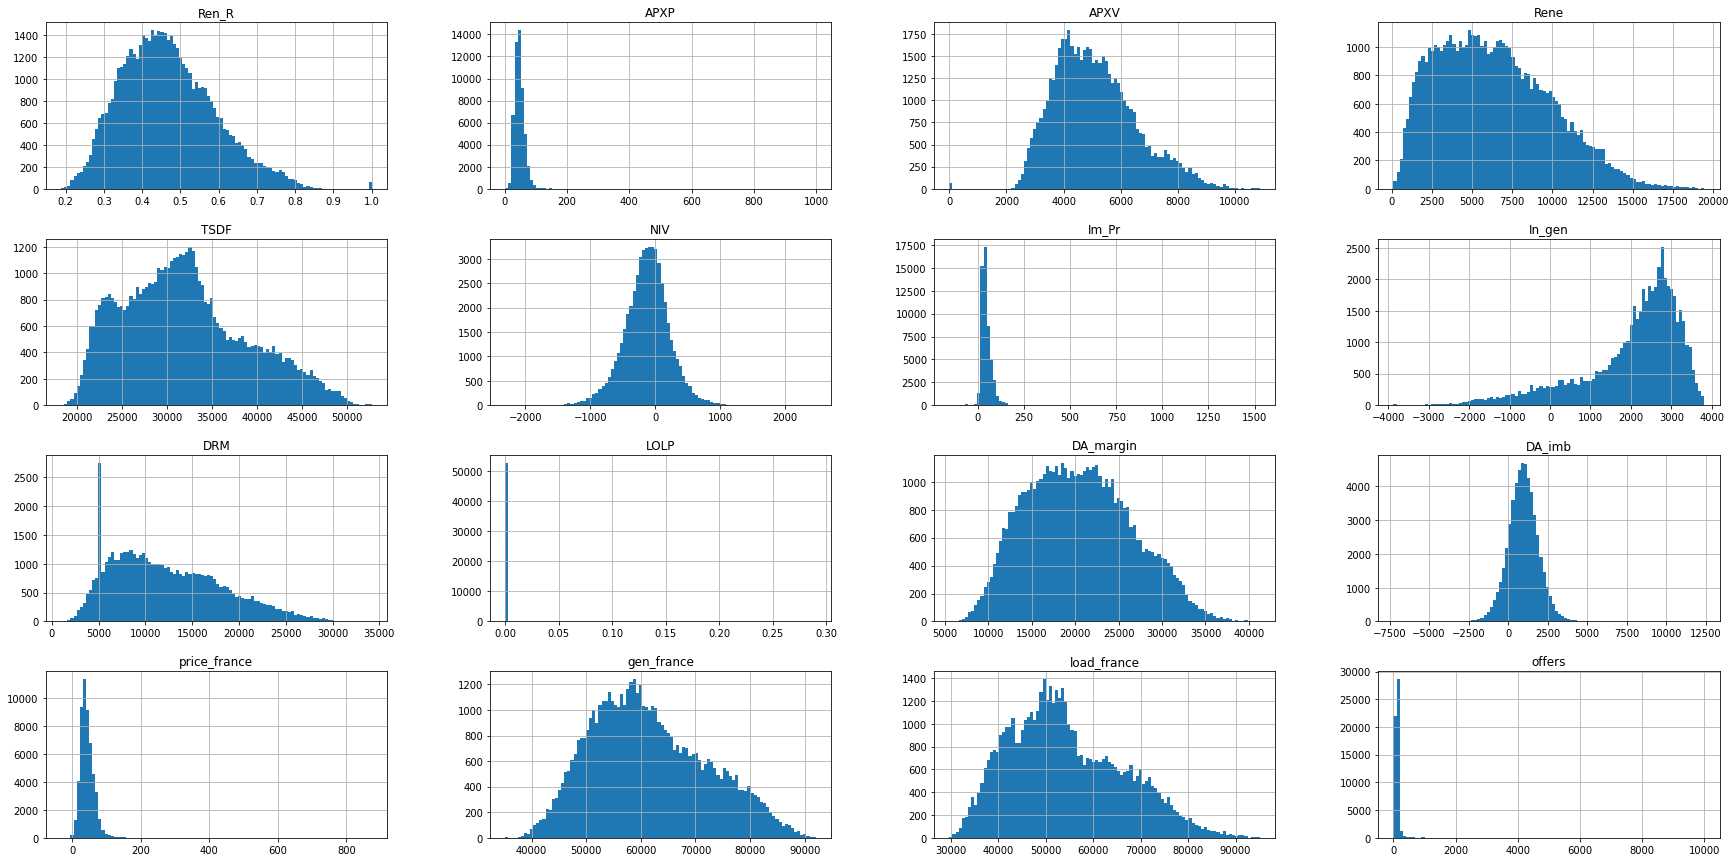

In [4]:
# understand distribution of non binary features
df_nonbin = df.loc[:, ['Ren_R', 'APXP', 'APXV', 'Rene', 'TSDF', 'NIV', 'Im_Pr', 'In_gen',
                       'DRM', 'LOLP', 'DA_margin', 'DA_imb', 'price_france',
                       'gen_france', 'load_france', 'offers']]

df_nonbin.hist(bins = 100, figsize = (30, 15))
plt.savefig('eda/distribution_plots.png')

### Check correlations with the output 

In [5]:
def plot_corr_matrix(df, filename):
    # generate correlation matrix
    matrix = abs(df.corr())

    # save matrix in png format
    fig, ax = plt.subplots(figsize=(18,12))
    sn.heatmap(matrix, annot=True, linewidths=.5, ax=ax, annot_kws={"size":14}, cmap="Blues", fmt='.2f')
    ax.tick_params(axis = "both", labelsize = 14),
    fig.show()
    fig.savefig(f"eda/{filename}.png", bbox_inches='tight')
    
    return matrix

<ipython-input-5-3b23a30f51e1>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


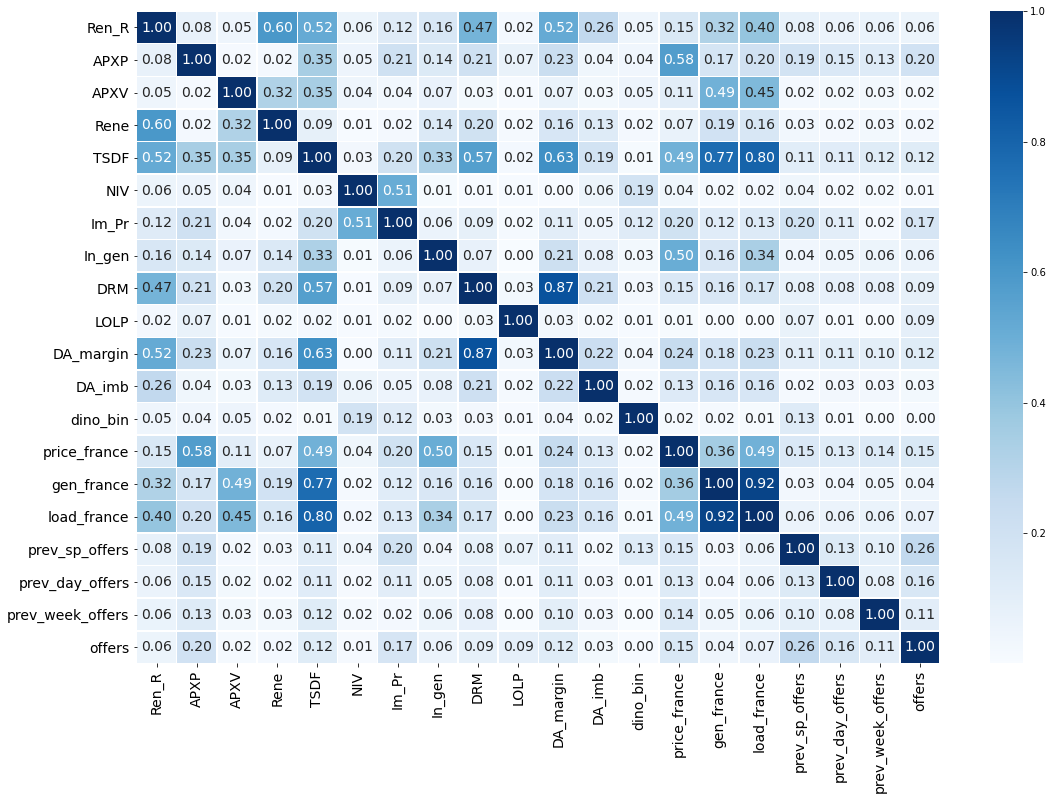

In [6]:
# move offer for end of data frame
target = df.pop("offers")
df["offers"] = target

# check correlations for all years - 2016, 2017 and 2018
corr_matrix = plot_corr_matrix(df, "data_corr_matrix")

<ipython-input-5-3b23a30f51e1>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


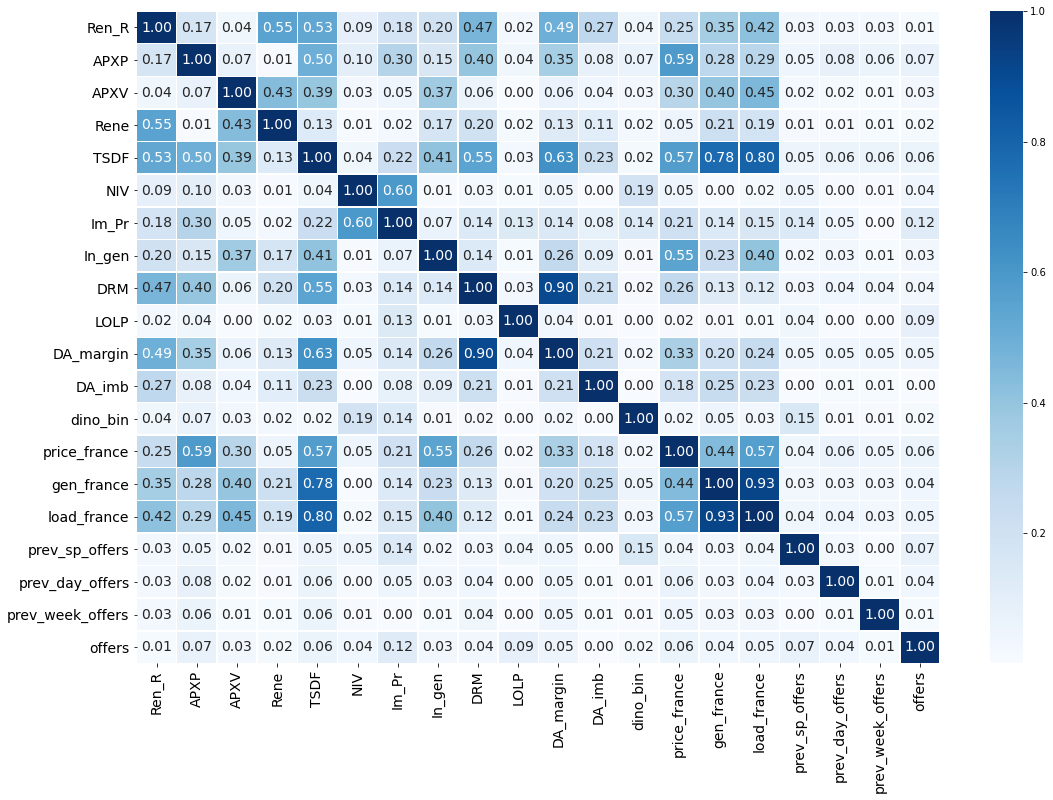

In [7]:
# check correlations for last two years - 2017 and 2018
corr_matrix = plot_corr_matrix(df.loc[(df.index.year > 2016)], "data_corr_matrix_17_18")

<ipython-input-5-3b23a30f51e1>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


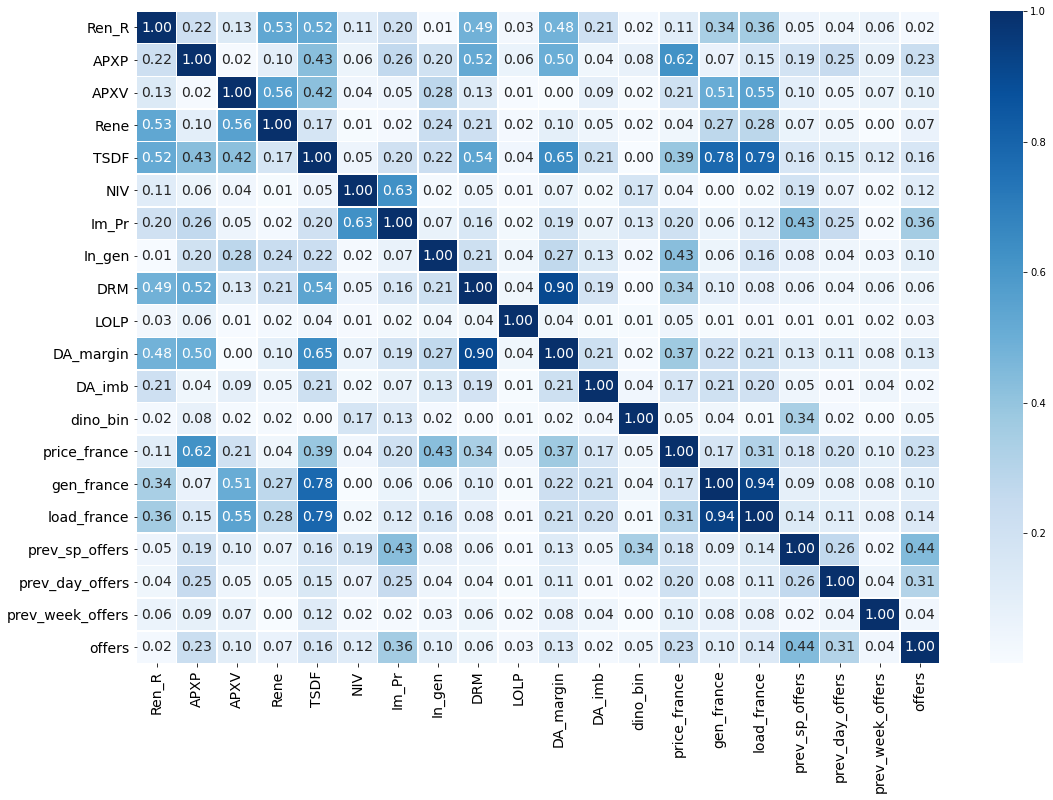

In [8]:
# check correlations for last year - 2018
corr_matrix = plot_corr_matrix(df.loc[(df.index.year >= 2018)], "data_corr_matrix_18")

In [9]:
# save only features with correlations higher than 0.05 with the output
df_final = df.loc[:, corr_matrix["offers"][corr_matrix["offers"] >= 0.05].index]
df_final.to_csv("processed_data/data_final.csv")

In [10]:
# save features used during modelling
df["imbalance_france"] = df['load_france']/df['gen_france']
df_final_old = df.loc[:, ["Ren_R", "APXP", "Rene", "TSDF", "Im_Pr", "In_gen", "LOLP", "prev_day_offers","prev_week_offers", "DA_margin", "price_france", "dino_bin", "imbalance_france", "offers"]]
df_final_old.to_csv("processed_data/data_final_old.csv")